In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

from pandas.plotting import register_matplotlib_converters
plt.rcParams['figure.figsize'] = [22, 10]
register_matplotlib_converters()


from src.ireland_c19_data import get_daily_c19_ireland_data, get_gov_c19_ireland_dataset
from src.c19_plotting import C19Plot

df = get_daily_c19_ireland_data()
df_hspc = get_gov_c19_ireland_dataset()

c19plot = C19Plot(df, df_hspc)
df

,date,c19_icu_cases,available_icu_beds,c19_ventilated_cases,c19_icu_cases_rm,c19_ventilated_cases_rm,available_icu_beds_rm
26,2020-05-09,72,161,51,73.333333,51.000000,153.666667
27,2020-05-10,72,156,50,72.000000,51.000000,154.333333
28,2020-05-11,69,155,47,71.000000,49.333333,157.333333
29,2020-05-12,67,148,45,69.333333,47.333333,153.000000
30,2020-05-13,62,149,43,66.000000,45.000000,150.666667
31,2020-05-14,59,131,44,62.666667,44.000000,142.666667
32,2020-05-15,56,155,40,59.000000,42.333333,145.000000
33,2020-05-16,54,151,38,56.333333,40.666667,145.666667
34,2020-05-17,51,138,34,53.666667,37.333333,148.000000
35,2020-05-18,55,141,39,53.333333,37.000000,143.333333


In [14]:
df_hspc.tail()

,X,Y,Date,ConfirmedCovidCases,TotalConfirmedCovidCases,ConfirmedCovidDeaths,TotalCovidDeaths,ConfirmedCovidRecovered,TotalCovidRecovered,StatisticsProfileDate,...,RequiringICUCovidCases_new,RequiringICUCovidCases_new_rm,HospitalisedAged5_new_rm,HospitalisedAged5to14_new_rm,HospitalisedAged15to24_new_rm,HospitalisedAged25to34_new_rm,HospitalisedAged35to44_new_rm,HospitalisedAged45to54_new_rm,HospitalisedAged55to64_new_rm,HospitalisedAged65up_new_rm
103,-856335.869598,7.036492e+06,2020-06-13 00:00:00+00:00,46,25295,5,1705,21929,21929,2020/06/11 00:00:00+00,...,1.0,1.666667,0.000000,0.0,0.000000,0.333333,0.333333,0.000000,0.333333,0.333333
104,-856335.869598,7.036492e+06,2020-06-14 00:00:00+00:00,8,25303,1,1706,21929,21929,2020/06/12 00:00:00+00,...,0.0,1.333333,0.000000,0.0,0.000000,0.666667,0.000000,0.000000,0.333333,0.666667
105,-856335.869598,7.036492e+06,2020-06-15 00:00:00+00:00,18,25321,0,1706,21929,21929,2020/06/13 00:00:00+00,...,1.0,0.666667,0.000000,0.0,0.000000,0.333333,0.000000,0.000000,0.333333,0.666667
106,-856335.869598,7.036492e+06,2020-06-16 00:00:00+00:00,14,25334,3,1709,21929,21929,2020/06/14 00:00:00+00,...,1.0,0.666667,0.000000,0.0,0.000000,0.333333,0.000000,0.333333,0.333333,1.666667
107,-856335.869598,7.036492e+06,2020-06-17 00:00:00+00:00,8,25341,3,1710,21929,21929,2020/06/15 00:00:00+00,...,0.0,0.666667,0.333333,0.0,0.333333,0.000000,0.333333,0.333333,0.000000,1.333333


In [15]:
# don't need this anymore
#c19plot.daily_death_vs_icu()

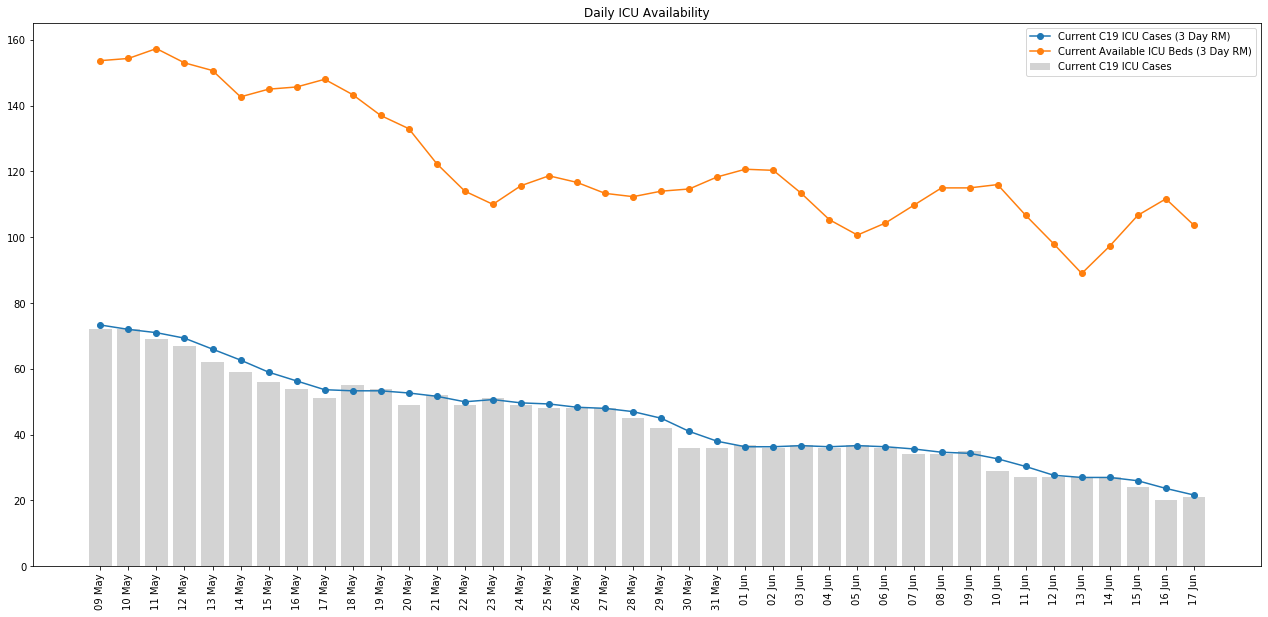

In [16]:
c19plot.daily_icu_availability()

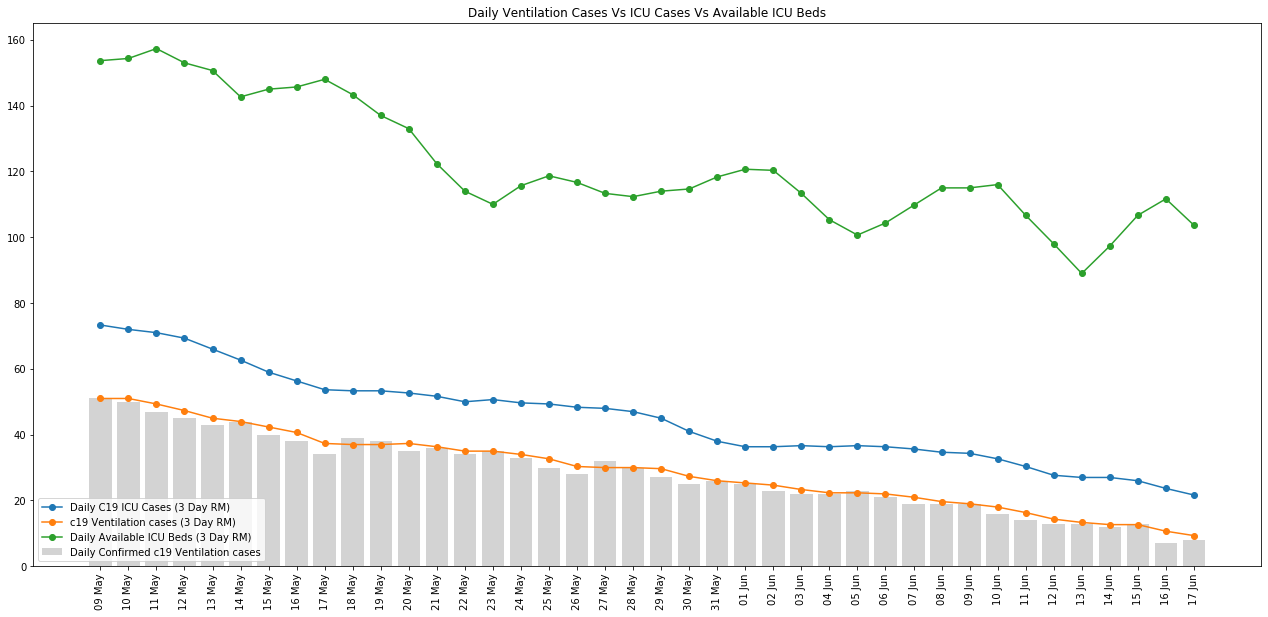

In [17]:
c19plot.daily_icu_vs_ventilation()

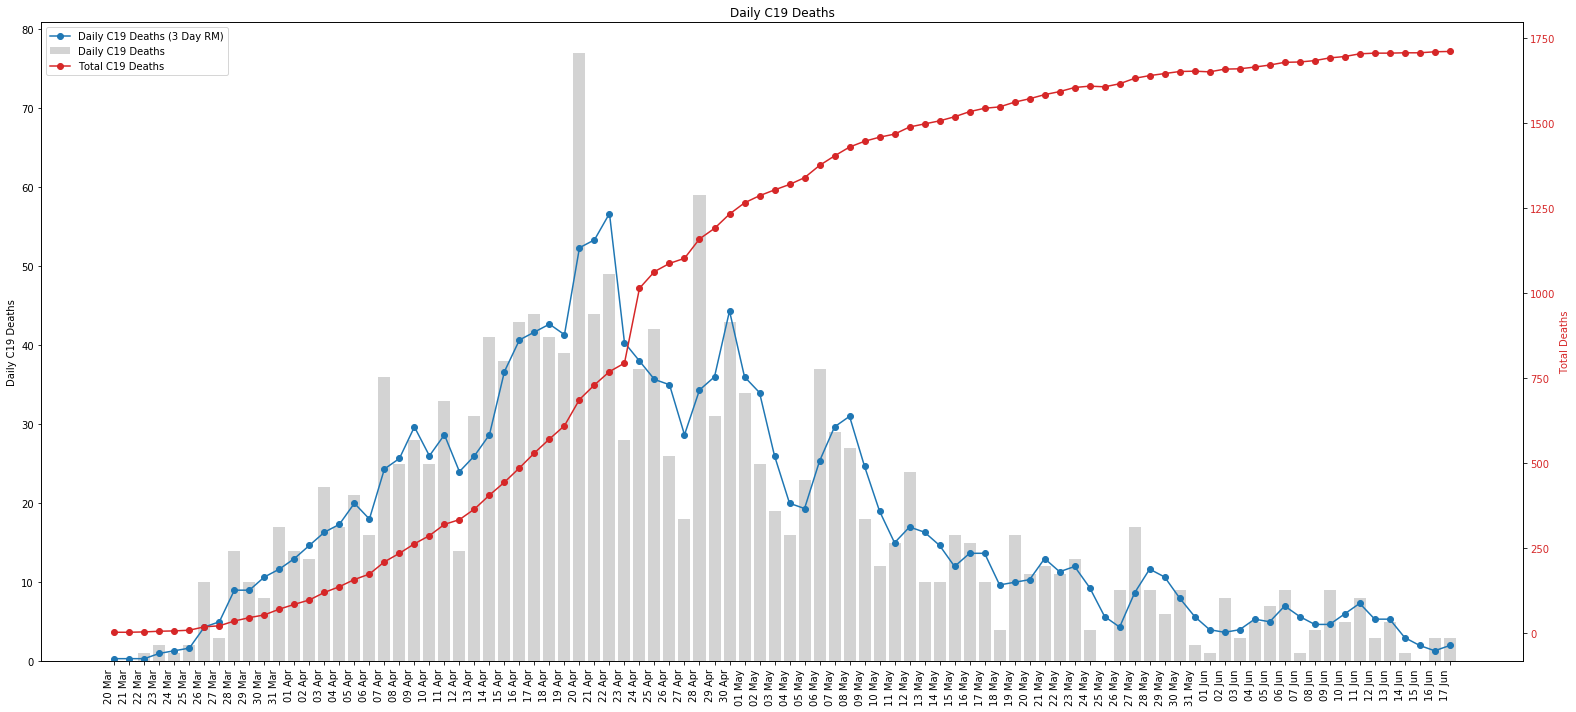

In [18]:
c19plot.hspc_daily_deaths()

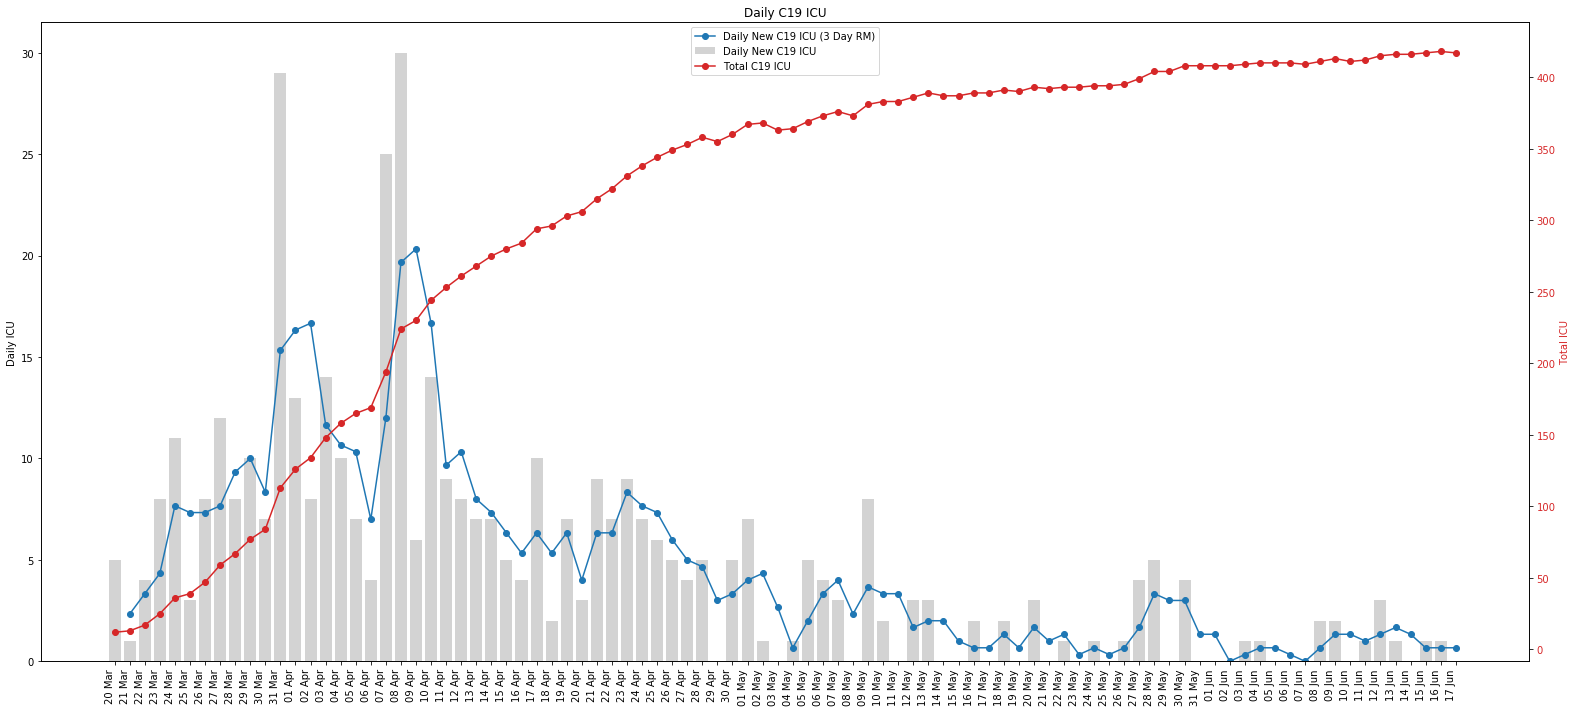

In [19]:
c19plot.hspc_icu()

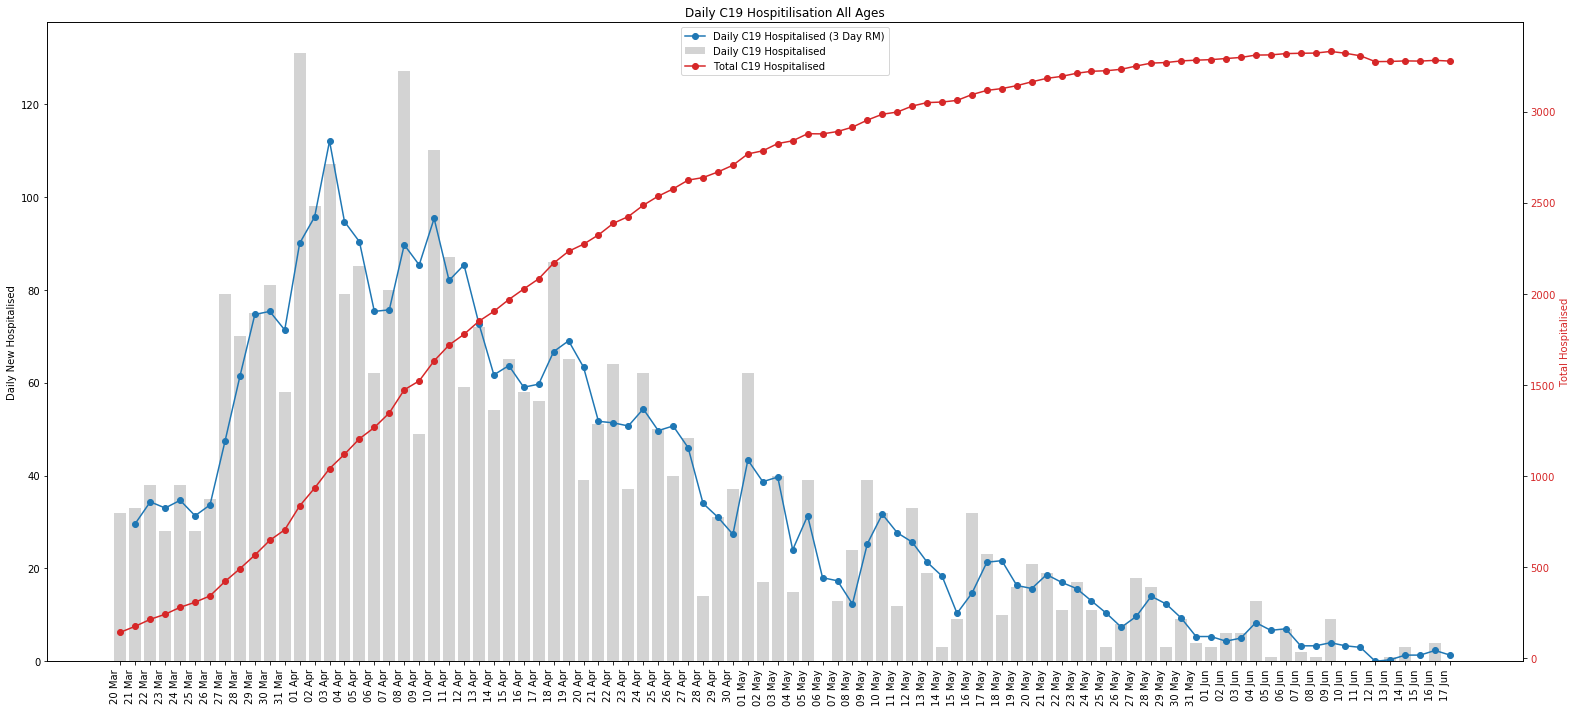

In [20]:
c19plot.hspc_hospitilisation()

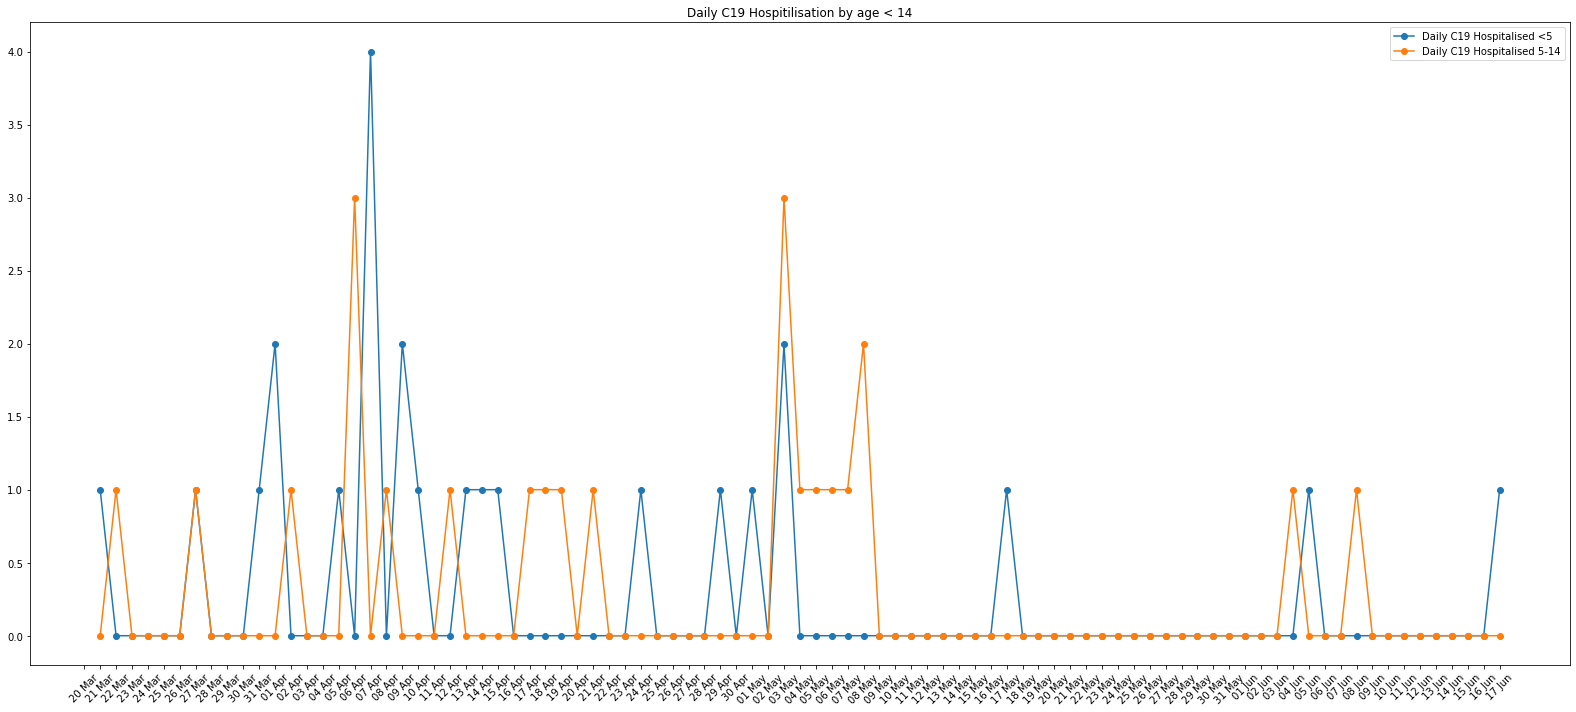

In [21]:
c19plot.hspc_hospitilisation_less_14()

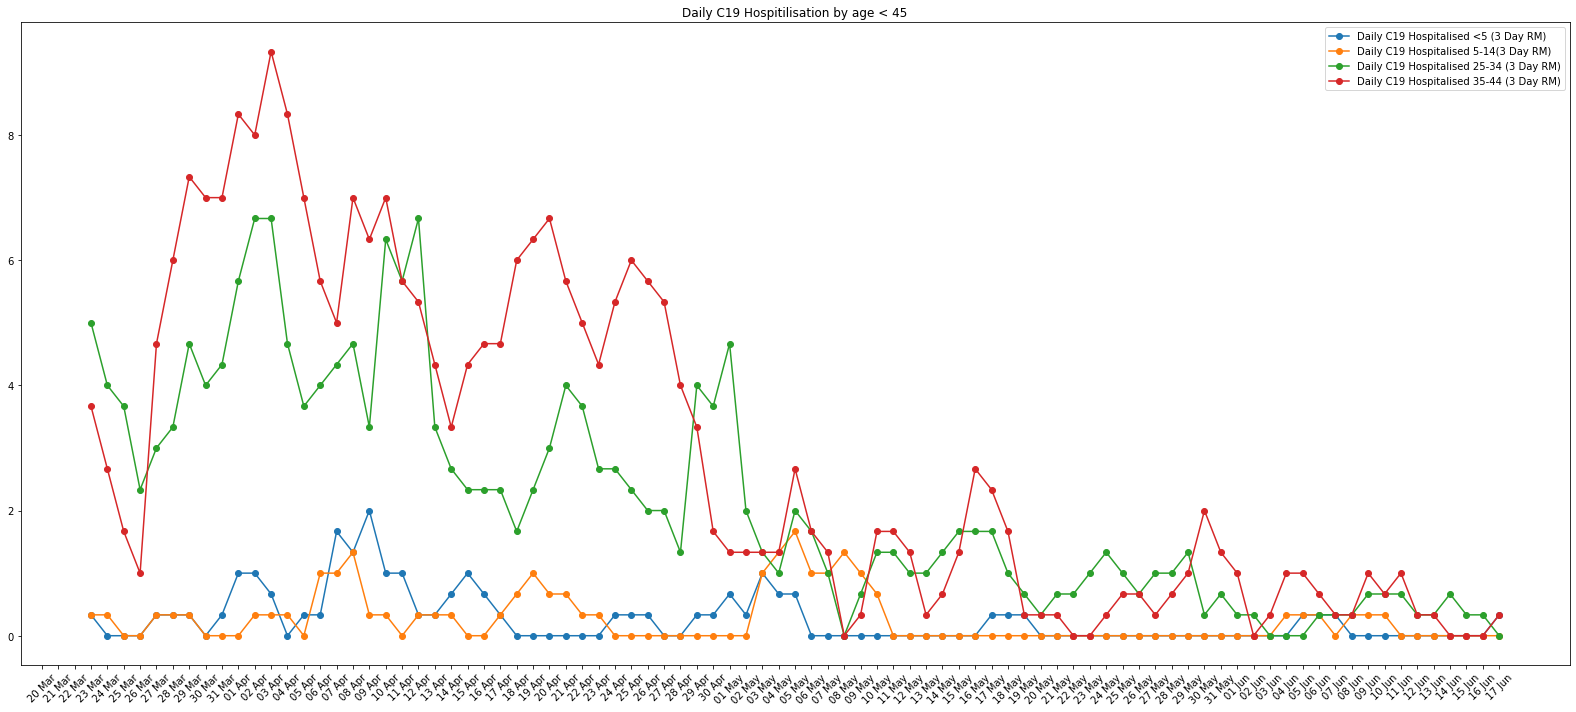

In [22]:
c19plot.hspc_hospitilisation_less_45()

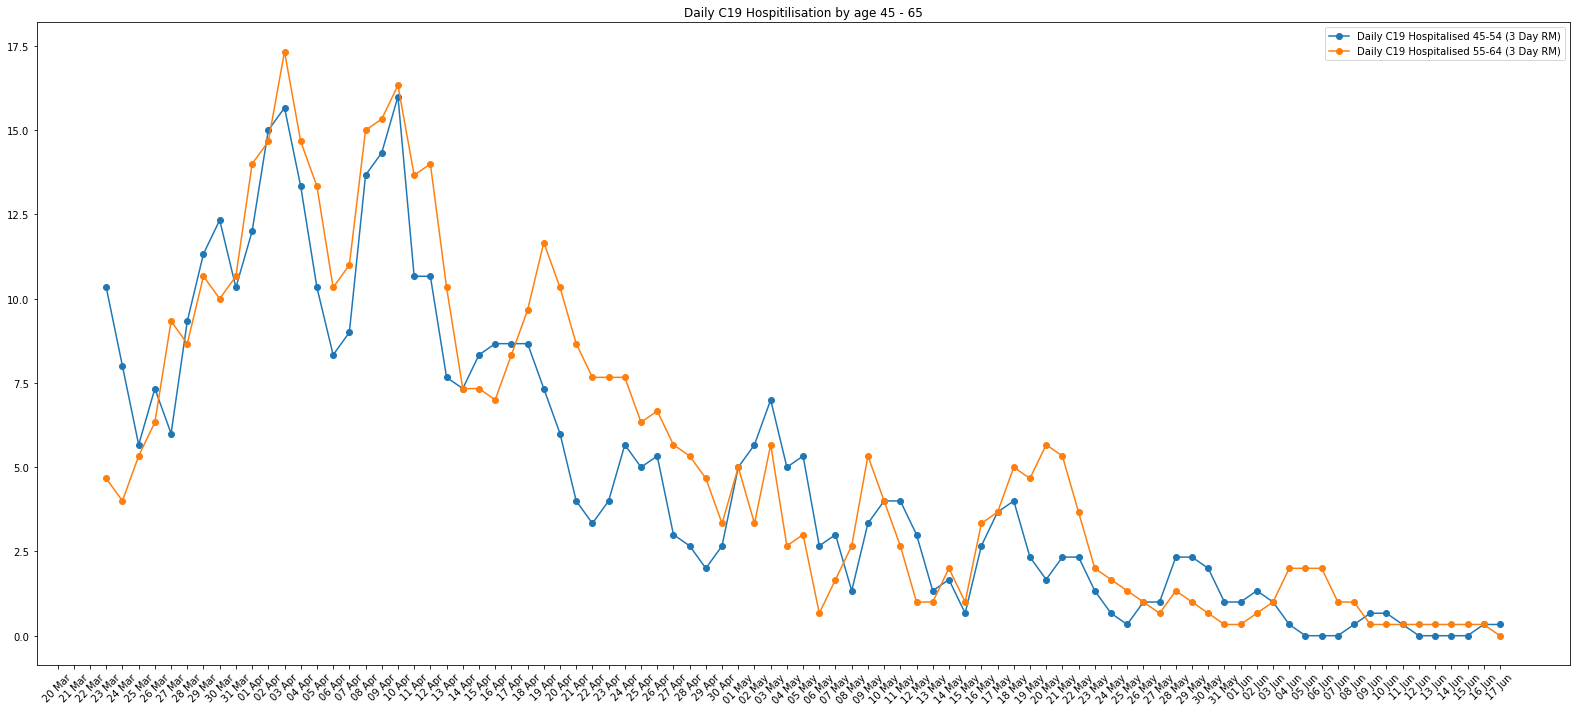

In [23]:
c19plot.hspc_hospitilisation_45_to_65()

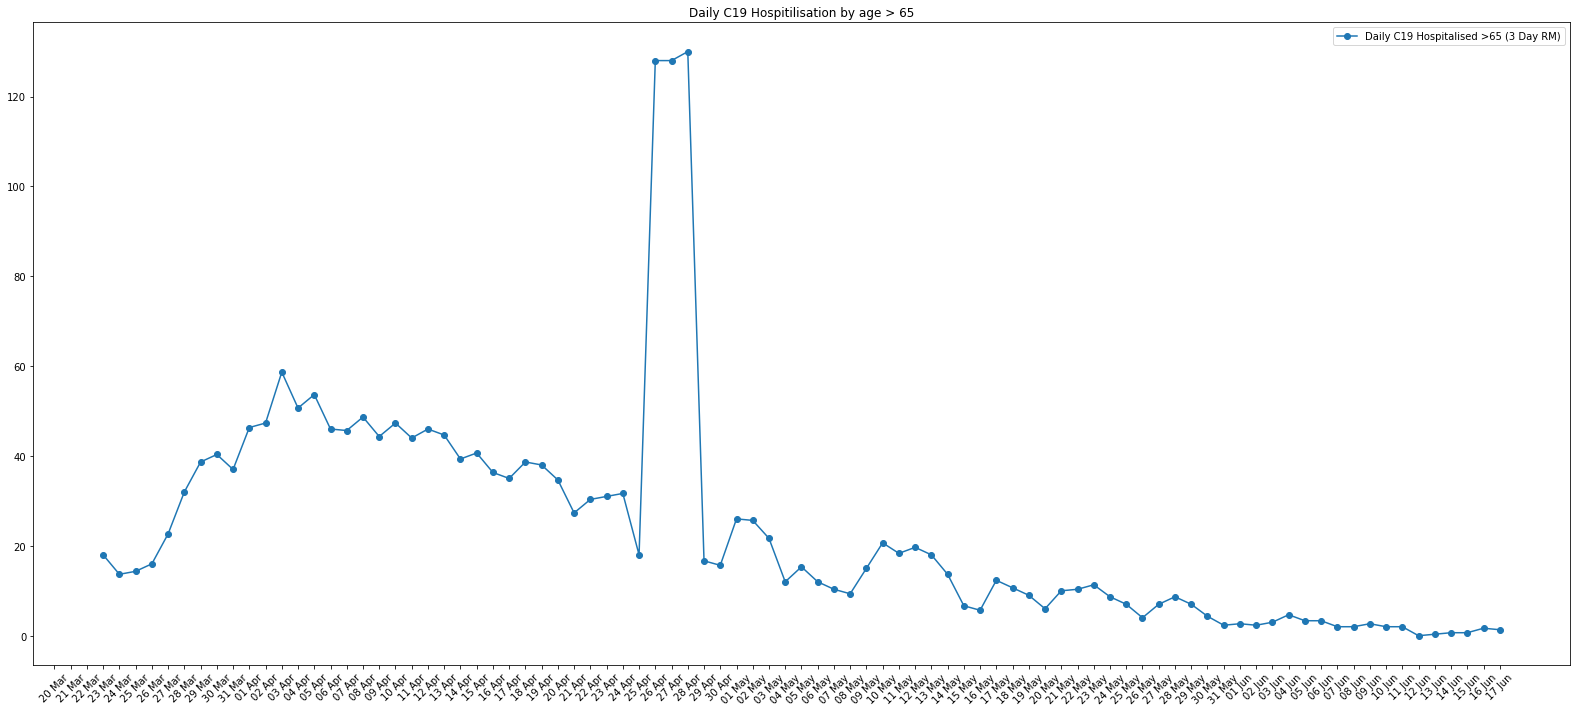

In [24]:
c19plot.hspc_hospitilisation_greater_65()